In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

import io

df = pd.read_csv("dataset_part_2.csv")

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,1
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,1
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,1
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,1
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,1


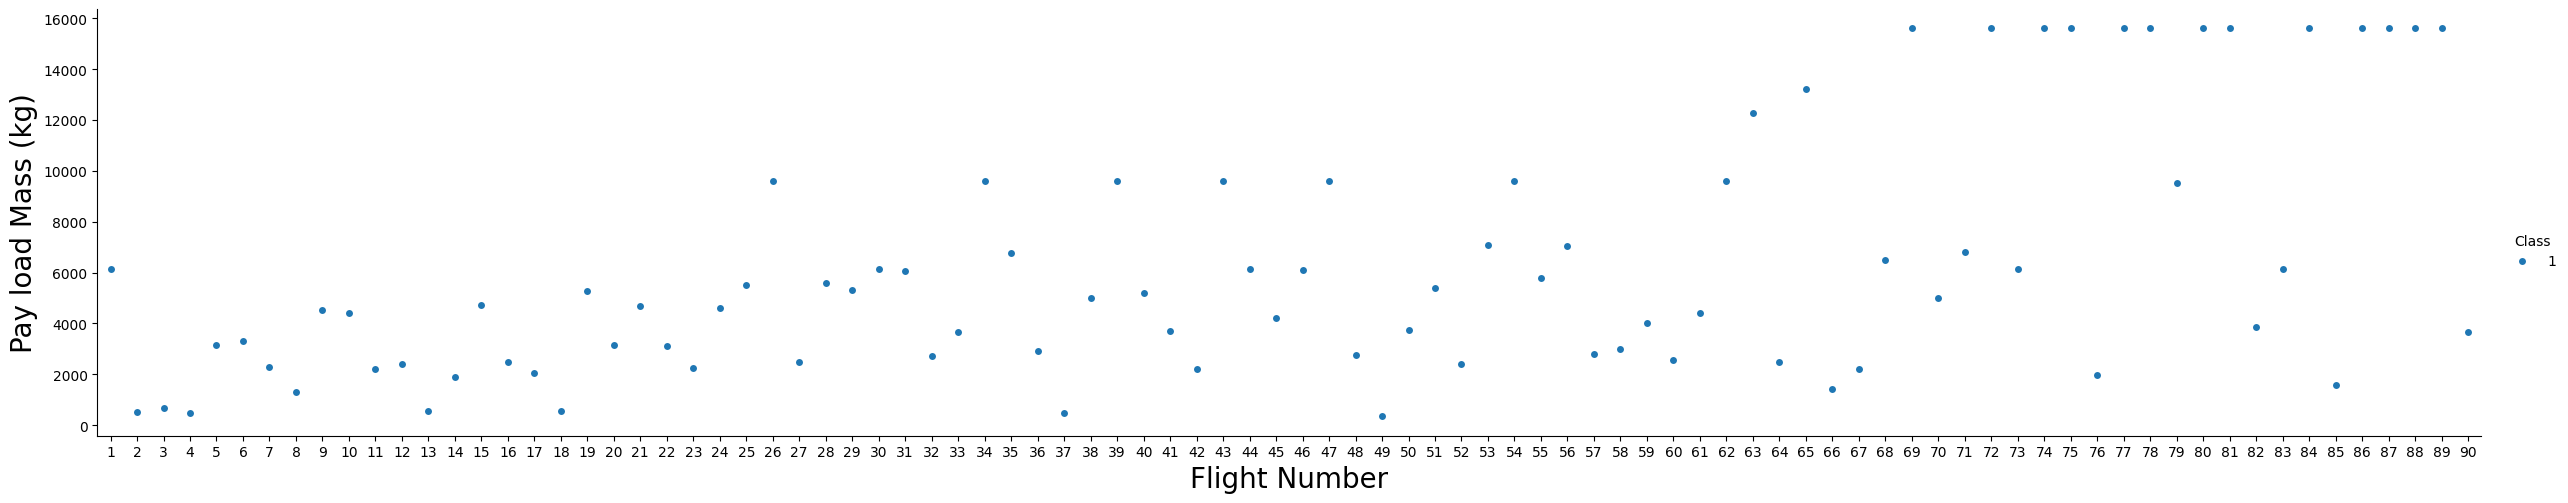

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Visualize the relationship between Flight Number and Launch Site¶

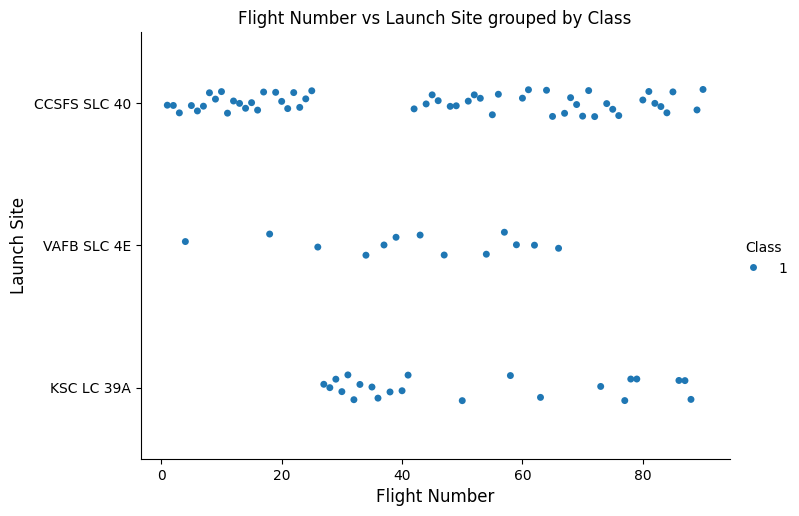

In [5]:
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=1.5, kind='strip')

plt.xlabel("Flight Number", fontsize=12)
plt.ylabel("Launch Site", fontsize=12)
plt.title("Flight Number vs Launch Site grouped by Class")
plt.show()

 Visualize the relationship between Payload Mass and Launch Site

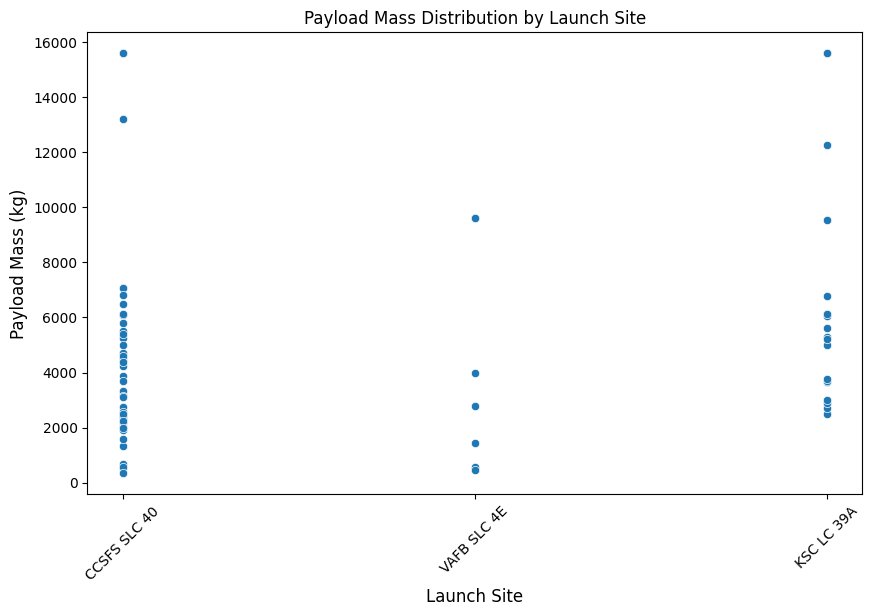

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="LaunchSite", y="PayloadMass",data=df)

plt.xlabel("Launch Site", fontsize=12)
plt.ylabel("Payload Mass (kg)", fontsize=12)
plt.title("Payload Mass Distribution by Launch Site")
plt.xticks(rotation=45)  # Rotate for better readability
plt.show()

Visualize the relationship between success rate of each orbit type

<Axes: xlabel='Orbit', ylabel='SuccessRate'>

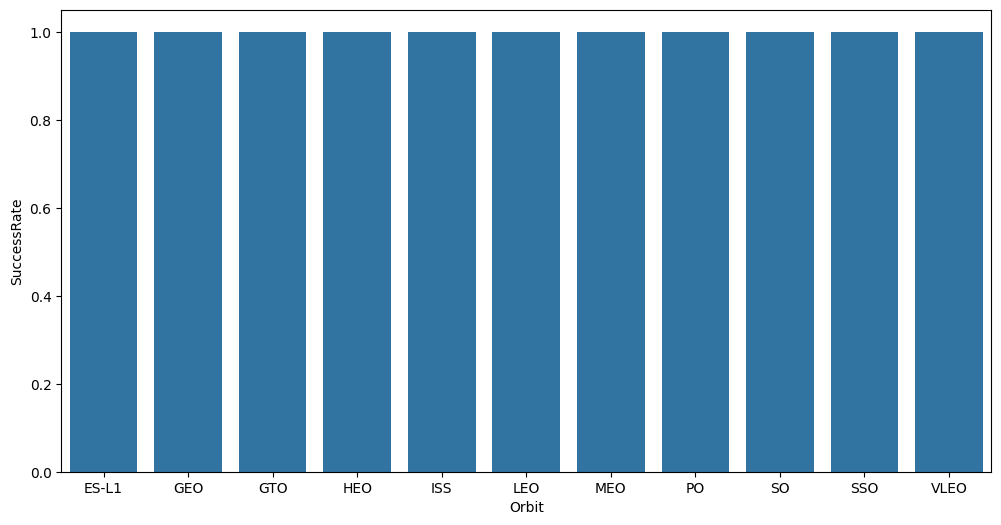

In [19]:
# Group by Orbit and calculate mean of Class (i.e., success rate)
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Rename the column for clarity
orbit_success_rate.rename(columns={'Class': 'SuccessRate'}, inplace=True)

# Plot the success rate for each orbit type
plt.figure(figsize=(12, 6))

sns.barplot(x='Orbit', y='SuccessRate', data=orbit_success_rate)



Visualize the relationship between FlightNumber and Orbit type

<Axes: xlabel='FlightNumber', ylabel='Orbit'>

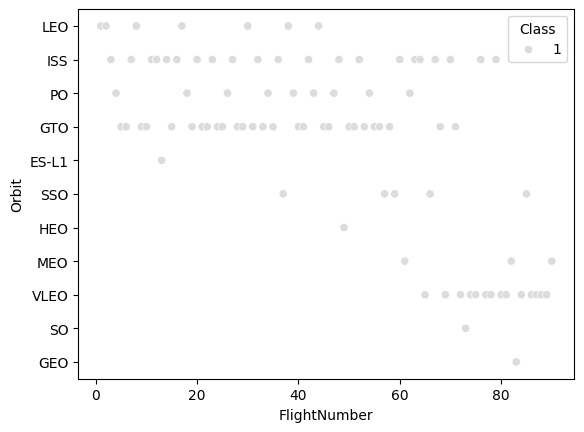

In [18]:
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df, palette='coolwarm')

Visualize the relationship between Payload Mass and Orbit type

<Axes: xlabel='Orbit', ylabel='PayloadMass'>

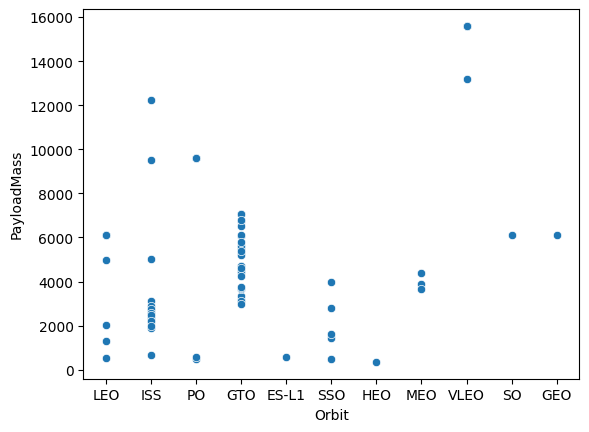

In [21]:
sns.scatterplot(x='Orbit', y='PayloadMass', data=df)


In [24]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,1
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,1
2,3,2013,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,1
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,1
4,5,2013,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,1


<Axes: xlabel='Date', ylabel='Class'>

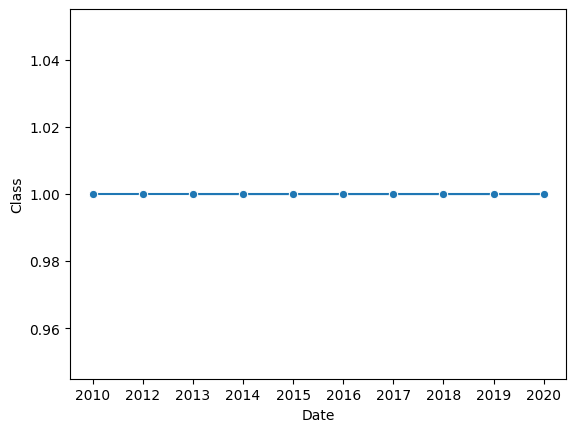

In [26]:
sns.lineplot(x='Date', y='Class', data=df, marker='o')


In [27]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [28]:
# Apply one-hot encoding to selected categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first 5 rows of the result
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Convert all numeric columns to float64
features_one_hot = features_one_hot.apply(pd.to_numeric, errors='ignore').astype('float64', errors='ignore')

# Confirm the changes
features_one_hot.dtypes.head()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2216\1559258421.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  features_one_hot = features_one_hot.apply(pd.to_numeric, errors='ignore').astype('float64', errors='ignore')


FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
dtype: object

In [30]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)